In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input, Dropout, BatchNormalization, Add, Concatenate
from tensorflow.keras.optimizers import SGD, Adam
from keras.utils import to_categorical, plot_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Nadam
from sklearn.model_selection import train_test_split

# MNIST Dataset

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Split the data into training, validation, and test sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Print the shapes of the sets
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation images shape:", x_val.shape)
print("Validation labels shape:", y_val.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training images shape: (48000, 28, 28)
Training labels shape: (48000, 10)
Validation images shape: (12000, 28, 28)
Validation labels shape: (12000, 10)
Test images shape: (10000, 28, 28)
Test labels shape: (10000, 10)


Model  1

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 128)         7385

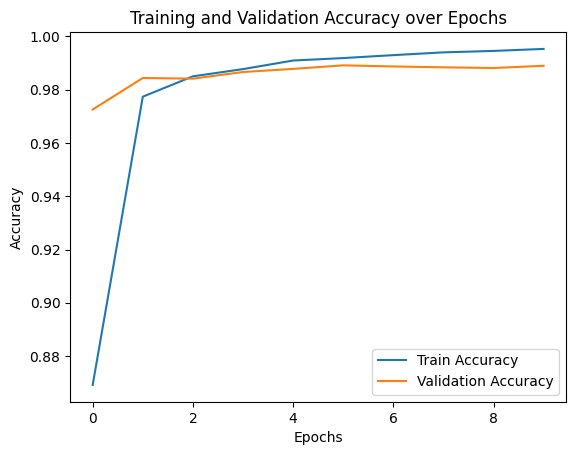

In [ ]:
# Define the CNN model with input shape matching MNIST images
inputs = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', strides=1)(inputs)
x = MaxPooling2D()(x)
x = Conv2D(64, 3, activation='relu', padding='same', strides=1)(x)
x = MaxPooling2D()(x)
x = Conv2D(128, 3, activation='relu', padding='same', strides=1)(x)
x = MaxPooling2D()(x)
x = Conv2D(160, 3, activation='relu', padding='same', strides=1)(x)
x = MaxPooling2D()(x)
x = Conv2D(128, 3, activation='relu', padding='same', strides=1)(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(12, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Nadam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

In [ ]:
# Print all the training and validation metrics
print("Training Metrics:")
print("Final Train Loss:", history.history['loss'][-1])
print("Final Train Accuracy:", history.history['accuracy'][-1])

print("\nValidation Metrics:")
print("Final Validation Loss:", history.history['val_loss'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])

Training Metrics:
Final Train Loss: 0.01667969860136509
Final Train Accuracy: 0.9953333139419556

Validation Metrics:
Final Validation Loss: 0.050669245421886444
Final Validation Accuracy: 0.9890000224113464


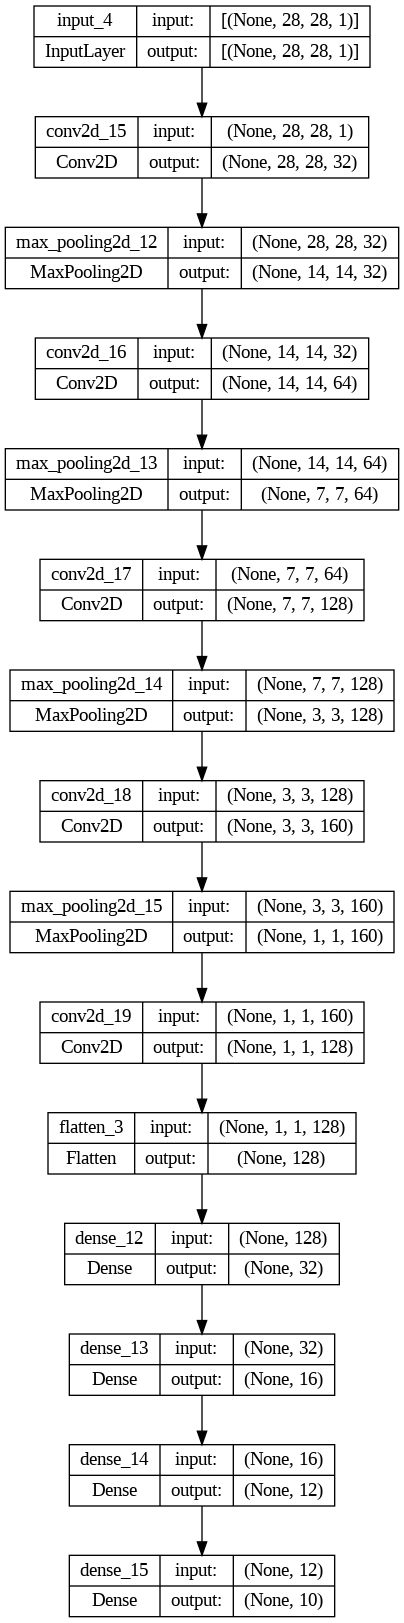

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture and save it as an image file (optional)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


Model 2 - Complex model

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_111 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_112 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_113 (Conv2D)         (None, 7, 7, 128)         738

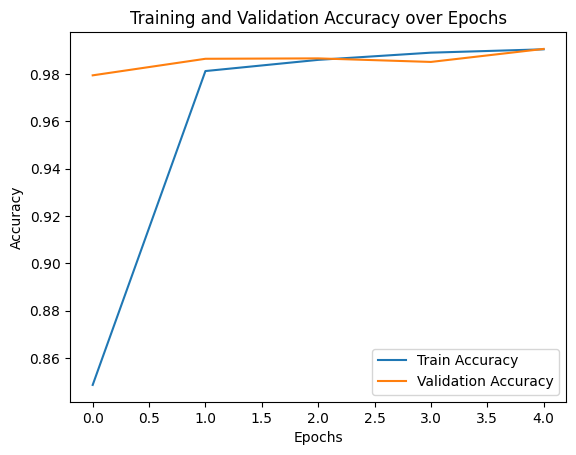

Training Metrics:
Final Train Loss: 0.036908313632011414
Final Train Accuracy: 0.9904166460037231

Validation Metrics:
Final Validation Loss: 0.04138162359595299
Final Validation Accuracy: 0.9905833601951599


In [ ]:
# Define the CNN model with input shape matching MNIST images
inputs = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', strides=1)(inputs)
x = MaxPooling2D()(x)
x = Conv2D(64, 3, activation='relu', padding='same', strides=1)(x)
x = MaxPooling2D()(x)
x = Conv2D(128, 3, activation='relu', padding='same', strides=1)(x)
x = MaxPooling2D()(x)
x = Conv2D(160, 3, activation='relu', padding='same', strides=1)(x)
x = MaxPooling2D()(x)
x = Conv2D(256, 3, activation='relu', padding='same', strides=1)(x)
x = Conv2D(128, 3, activation='relu', padding='same', strides=1)(x)
x = Conv2D(64, 3, activation='relu', padding='same', strides=1)(x)
x = Flatten()(x)

x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(12, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Nadam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

# Print all the training and validation metrics
print("Training Metrics:")
print("Final Train Loss:", history.history['loss'][-1])
print("Final Train Accuracy:", history.history['accuracy'][-1])

print("\nValidation Metrics:")
print("Final Validation Loss:", history.history['val_loss'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])

With Skip Connections - Model 3

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_37 (Conv2D)          (None, 28, 28, 32)           320       ['input_9[0][0]']             
                                                                                                  
 max_pooling2d_25 (MaxPooli  (None, 14, 14, 32)           0         ['conv2d_37[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_38 (Conv2D)          (None, 14, 14, 32)           9248      ['max_pooling2d_25[0][0]

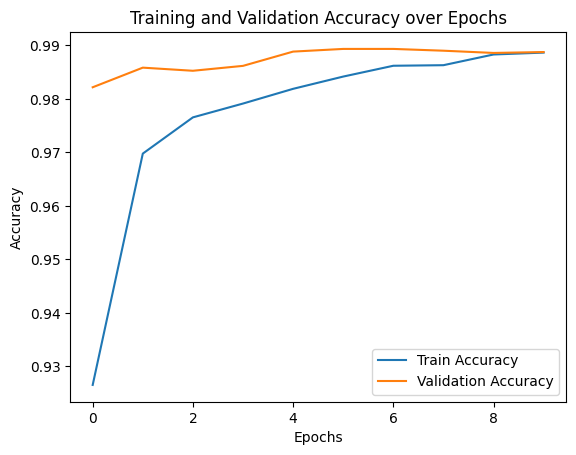

Training Metrics:
Final Train Loss: 0.03745508939027786
Final Train Accuracy: 0.9886458516120911

Validation Metrics:
Final Validation Loss: 0.05322412773966789
Final Validation Accuracy: 0.9887499809265137


In [ ]:
from tensorflow.keras.layers import Add, Dropout

# Define the CNN model
inputs = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
y = Conv2D(32, (1, 1), padding='same')(x)
#x = MaxPooling2D((2, 2))(x)
# Skip connection
x = Add()([x, y])
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Nadam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=16, epochs=10, validation_data=(x_val, y_val))

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

# Print all the training and validation metrics
print("Training Metrics:")
print("Final Train Loss:", history.history['loss'][-1])
print("Final Train Accuracy:", history.history['accuracy'][-1])

print("\nValidation Metrics:")
print("Final Validation Loss:", history.history['val_loss'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])


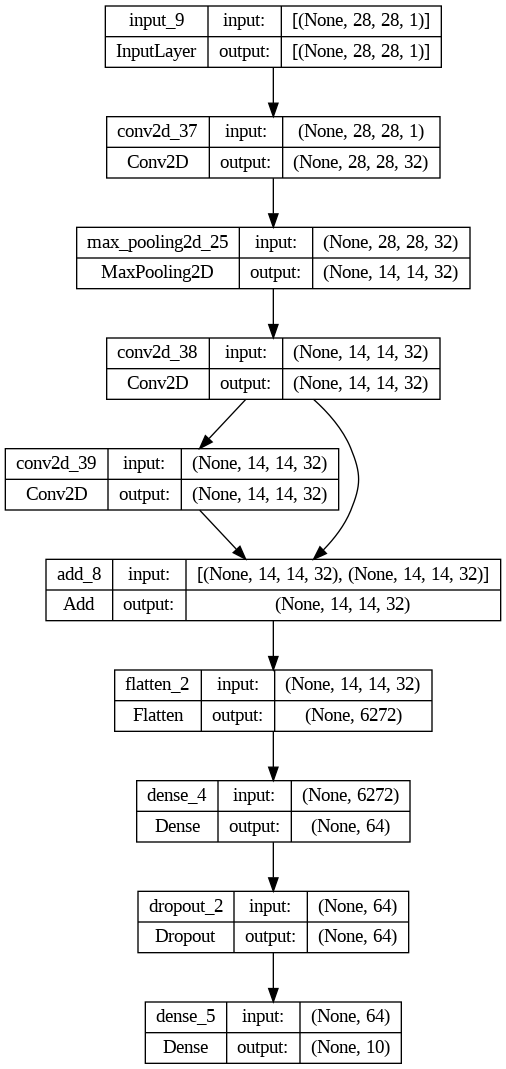

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Conclusion :

Model 2, the complex model, performs the best on the MNIST dataset, exhibiting a high accuracy of 99.04% on the validation set and the lowest validation loss (0.0414). It outperforms both Model 1 and Model 3 in terms of classification accuracy and generalization.










# CIFAR-10

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split the data into training, validation, and test sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Print the shapes of the sets
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation images shape:", x_val.shape)
print("Validation labels shape:", y_val.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


Training images shape: (40000, 32, 32, 3)
Training labels shape: (40000, 10)
Validation images shape: (10000, 32, 32, 3)
Validation labels shape: (10000, 10)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)


Model 1

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 8, 8, 128)         7385

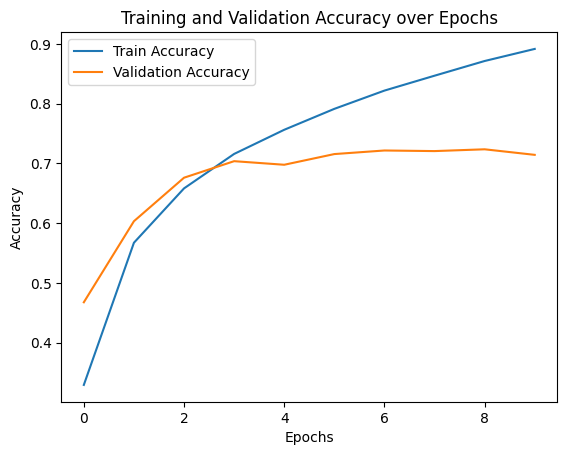

In [ ]:
# Define the CNN model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', strides=1)(inputs)
x = MaxPooling2D()(x)
x = Conv2D(64, 3, activation='relu', padding='same', strides=1)(x)
x = MaxPooling2D()(x)
x = Conv2D(128, 3, activation='relu', padding='same', strides=1)(x)
x = MaxPooling2D()(x)
x = Conv2D(160, 3, activation='relu', padding='same', strides=1)(x)
x = MaxPooling2D()(x)
x = Conv2D(128, 3, activation='relu', padding='same', strides=1)(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(12, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Nadam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

Model 2 Complex Model

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_124 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_64 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_125 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_65 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_126 (Conv2D)         (None, 8, 8, 128)         738

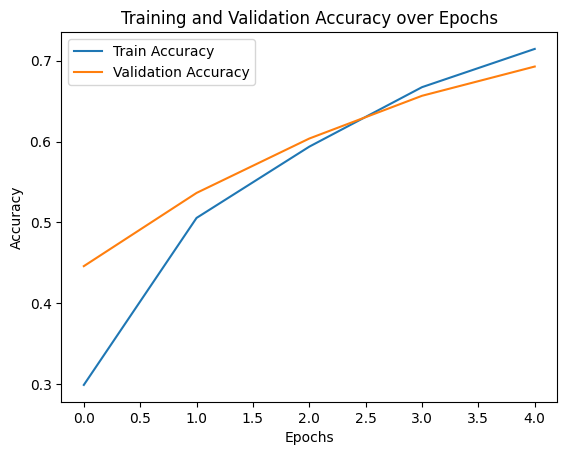

Training Metrics:
Final Train Loss: 0.8111305832862854
Final Train Accuracy: 0.7146000266075134

Validation Metrics:
Final Validation Loss: 0.890617311000824
Final Validation Accuracy: 0.692799985408783


In [ ]:
# Define the CNN model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', strides=1)(inputs)
x = MaxPooling2D()(x)
x = Conv2D(64, 3, activation='relu', padding='same', strides=1)(x)
x = MaxPooling2D()(x)
x = Conv2D(128, 3, activation='relu', padding='same', strides=1)(x)
x = MaxPooling2D()(x)
x = Conv2D(160, 3, activation='relu', padding='same', strides=1)(x)
x = MaxPooling2D()(x)
x = Conv2D(256, 3, activation='relu', padding='same', strides=1)(x)
x = MaxPooling2D()(x)
x = Conv2D(128, 3, activation='relu', padding='same', strides=1)(x)
x = Conv2D(64, 3, activation='relu', padding='same', strides=1)(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(12, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Nadam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

# Print all the training and validation metrics
print("Training Metrics:")
print("Final Train Loss:", history.history['loss'][-1])
print("Final Train Accuracy:", history.history['accuracy'][-1])

print("\nValidation Metrics:")
print("Final Validation Loss:", history.history['val_loss'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])

Model -3 with Skip connections

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_27 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_107 (Conv2D)         (None, 32, 32, 32)           896       ['input_27[0][0]']            
                                                                                                  
 conv2d_108 (Conv2D)         (None, 32, 32, 32)           9248      ['conv2d_107[0][0]']          
                                                                                                  
 conv2d_109 (Conv2D)         (None, 32, 32, 32)           9248      ['conv2d_108[0][0]']          
                                                                                           

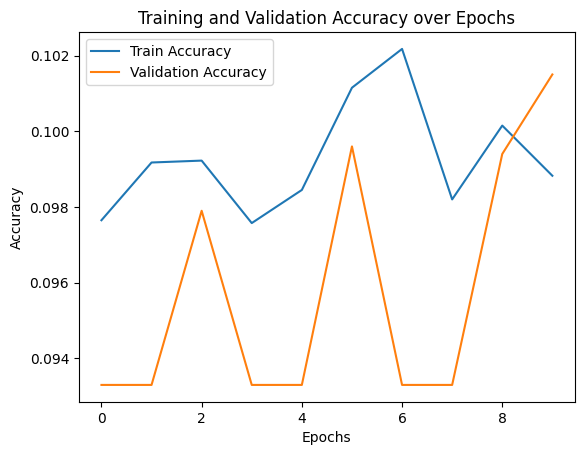

In [ ]:
from tensorflow.keras.layers import Conv2D, Reshape, Add, Flatten, Dense, Dropout

input_tensor = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_tensor)

# Save the input of the first 32 for the skip connection
skip_connection = input_tensor

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

# Use a 1x1 convolution to adjust the number of channels in skip_connection
skip_connection = Conv2D(32, (1, 1), activation='relu')(skip_connection)

# Add the skip connection to the third 32
x = Add()([x, skip_connection])

x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=outputs)
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Nadam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

Conclusion :

Model -1 performs the best on the CIFAR-10 dataset, with the highest validation accuracy (71.44%) and relatively lower validation loss (1.0818). Both Model -2 (complex model) and Model -3 (skip connections) exhibit lower performance in terms of accuracy and validation loss.








